

**THIS IS NOT THE COMPLETE TUTORIAL - see file with (MAIN) in the name. Paste all this code before the first Python block**

First you'll need to select which hardware setup you have. You'll need to select both a `SCOPETYPE` and a `PLATFORM`. `SCOPETYPE` can either be `'OPENADC'` for the CWLite/CW1200 or `'CWNANO'` for the CWNano. `PLATFORM` is the target device, with `'CWLITEARM'`/`'CW308_STM32F3'` being the best supported option, followed by `'CWLITEXMEGA'`/`'CW308_XMEGA'`, then by `'CWNANO'`. As of CW 5.4, you can select the SimpleSerial version
used. For example:

```python
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
SS_VER = 'SS_VER_2_1'
```

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
SS_VER = 'SS_VER_2_1'
import os
os.chdir('C:/Users/prith/ChipWhisperer5_64/cw/home/portable/chipwhisperer/jupyter/courses/sca101')

This code will connect the scope and do some basic setup. We're now just going to use a special setup script to do this. This script contains the commands we ran seperately before.

In [2]:
%run "../../Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍
cwlite Device
sn         = 50203220343043543230333234323038
fw_version = 
    major = 0
    minor = 64
    debug = 0
gain = 
    mode = low
    gain = 0
    db   = 5.5
adc = 
    state          = False
    basic_mode     = low
    timeout        = 2
    offset         = 0
    presamples     = 0
    samples        = 24400
    decimate       = 1
    trig_count     = 9519433
    fifo_fill_mode = normal
clock = 
    adc_src       = clkgen_x1
    adc_phase     = 0
    adc_freq      = 0
    adc_rate      = 0.0
    adc_locked    = True
    freq_ctr      = 0
    freq_ctr_src  = extclk
    clkgen_src    = system
    extclk_freq   = 10000000
    clkgen_mul    = 2
    clkgen_div    = 1
    clkgen_freq   = 192000000.0
    clkgen_locked = True
trigger = 
    triggers = tio4
    module   = basic
io = 
    tio1         = serial_tx
    tio2         = serial_rx
    tio3         = high_z
    tio4         = high_z
    pdid         = high_z
    pdic         = high_z
    nrst    

The following code will build the firmware for the target.

In [42]:
# %%bash -s "$PLATFORM" "$SS_VER"
# cd ../../../hardware/victims/firmware/basic-passwdcheck
# make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$2 -j

SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Welcome to another exciting ChipWhisperer target build!!
.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWLITEARM/stm32f3_startup.lst -I.././simpleserial/ -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ .././hal/stm32f3/st

In [87]:
import os
os.chdir('C:/Users/prith/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/basic-NN')

!make PLATFORM=CWLITEARM CRYPTO_TARGET=NONE SS_VER=SS_VER_2_1

SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    basic-NN.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compiling:
    .././hal/stm32f3/stm32f3_hal.c ...Done!
.
Compiling:
    .././hal/stm32f3/stm32f3_hal_lowlevel.c ...Done!
.
Compiling:
    .././hal/stm32f3/stm32f3_sysmem.c ...Done!
.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=73728

Finally, all that's left is to program the device, which can be done with the following line:

In [88]:
cw.program_target(scope, prog, "basic-NN-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 37195 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 37195 bytes


To make interacting with the hardware easier, let's define a function to attempt a password and return a power trace:

In [53]:
# def cap_pass_trace(pass_guess):
#     reset_target(scope)
#     num_char = target.in_waiting()
#     while num_char > 0:
#         target.read(num_char, 10)
#         time.sleep(0.01)
#         num_char = target.in_waiting()

#     scope.arm()
#     target.write(pass_guess)
#     ret = scope.capture()
#     if ret:
#         print('Timeout happened during acquisition')

#     trace = scope.get_last_trace()
#     return trace

We also don't need all of the default 5000 samples in the trace. 3000 is a good starting point for most targets:

In [25]:
scope.adc.samples = 3000

In [107]:
f = open("C:/my_data/NNonSTM/ChipWhisperer_NN-main/modified_mnist_test.csv",'r')

c= 0
label = []
features_string = []
for line in f :
    if c >=1 :# and c<10 :
        features_label = line.split(",")
#        print(features)
        l = len(features_label)
        label.append(features_label[l-1].replace("\n",""))
        f_s = ""
        for i in range(0,l-1):
            f_s = f_s + features_label[i]
        features_string.append(f_s)
    c = c+ 1
    
print(features_string[1])
print(label[1])

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111000000000000000000000111111110000000000000000000111111111100000000000000000011100001110000000000000000001100001110000000000000000000000000111000000000000000000000000111100000000000000000000000011100000000000000000000000011110000000000000000000000011110000000000000000000000001110000000000000000000000001111000000000000000000000000111000000000000000000000000111100000000000000000000000111100000000000000000000000011100000000000000000000000001110000000000011110000000000111111111111111111100000000011111111111111111100000000000111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
2


In [108]:
# scope.dis()
# target.dis()
#
# DEFINE THE cap_pass_trace() function - either using a hardware connection or the file read-out.
#
def cap_pass_trace(pass_guess):
    reset_target(scope)
    num_char = target.in_waiting()
    m = ""
    while num_char > 0:
        m = target.read(num_char, 10)
        time.sleep(0.1)
        num_char = target.in_waiting()
        #print(m)
    
#     print(target.read)
    scope.arm()
    target.write(pass_guess)
    ret = scope.capture()
    if ret:
        print('Timeout happened during acquisition')

    trace = scope.get_last_trace()
    return trace, m

#raise NotImplementedError("Add your code here, and delete this.")

trace_test,m = cap_pass_trace(features_string[1]+"\n")

print(m)
#Basic sanity check
assert(len(trace_test) == 3000)
print("✔️ OK to continue!")

6 
✔️ OK to continue!


In [109]:
trace_list = []
pred_list = []
print(len(label))
for i in range(0,len(label)) :
    trace_h,m = cap_pass_trace(features_string[i]+"\n")
    time.sleep(2)
    trace_list.append(trace_h)
    pred_list.append(m)

print(pred_list)
# print(features_label[0:11])
    

10000
['2\x0f\x00', '7\x0f\x00', '2\x0f\x00', '1\x0f\x00', '0\x0f\x00', '4\x0f\x00', '1\x0f\x00', '4\x0f\x00', '9\x0f\x00', '6\x0f\x00', '9\x0f\x00', '0\x0f\x00', '6\x0f\x00', '9\x0f\x00', '0\x0f\x00', '1\x0f\x00', '5\x0f\x00', '9\x0f\x00', '7\x0f\x00', '3\x0f\x00', '4\x0f\x00', '9\x0f\x00', '6\x0f\x00', '6\x0f\x00', '5\x0f\x00', '4\x0f\x00', '0\x0f\x00', '7\x0f\x00', '4\x0f\x00', '0\x0f\x00', '1\x0f\x00', '3\x0f\x00', '1\x0f\x00', '3\x0f\x00', '0\x0f\x00', '7\x0f\x00', '2\x0f\x00', '7\x0f\x00', '1\x0f\x00', '3\x0f\x00', '1\x0f\x00', '1\x0f\x00', '7\x0f\x00', '4\x0f\x00', '2\x0f\x00', '3\x0f\x00', '5\x0f\x00', '1\x0f\x00', '2\x0f\x00', '4\x0f\x00', '4\x0f\x00', '6\x0f\x00', '3\x0f\x00', '5\x0f\x00', '5\x0f\x00', '6\x0f\x00', '0\x0f\x00', '4\x0f\x00', '1\x0f\x00', '9\x0f\x00', '5\x0f\x00', '7\x0f\x00', '8\x0f\x00', '9\x0f\x00', '3\x0f\x00', '7\x0f\x00', '4\x0f\x00', '6\x0f\x00', '4\x0f\x00', '3\x0f\x00', '0\x0f\x00', '7\x0f\x00', '0\x0f\x00', '2\x0f\x00', '9\x0f\x00', '1\x0f\x00', '7\x0

In [114]:
pred_list[0][0]
l = len(pred_list)
c = 0
for i in range(1,len(pred_list)) :
    if pred_list[i][0] == label[i-1] :
        c = c+1
print(f"Accuracy {float(c/l)}")

Accuracy 0.9204


In [143]:
all_sum_0 = [0]*len(trace_list[0])
# [sum(x) for x in zip(list1, list2)]
#print(all_sum_0)
nos_of_0 = 0
avg_0 = []
for i in range(1,len(pred_list)) :
    if pred_list[i][0] == '0' :
        all_sum_0 = [sum(x) for x in zip(all_sum_0, trace_list[i])]
        nos_of_0 = nos_of_0 + 1
for ele in all_sum_0 :
    avg_0.append(ele/nos_of_0)

print(nos_of_0)
print(avg_0)

1016
[0.11898779681348425, -0.042907234251968504, -0.027260127030019687, -0.009681040846456693, 0.05964047890009842, -0.2226341427780512, -0.04625888133612205, -0.017250361405019687, 0.05523537463090551, -0.07181290754183071, -0.029213252030019687, -0.010946919598917323, 0.05810066283218504, -0.04563122846948819, 0.036235659141240155, 0.055300735113188976, 0.12210203155757875, -0.06273837352362205, -0.04400490588090551, -0.021798682025098427, 0.05158095472440945, -0.1074459045890748, -0.050863911786417325, -0.02258781373031496, 0.053517739603838585, -0.19604684424212598, -0.10893862266240158, -0.06793068713090551, 0.024308332308070866, -0.15440933347687008, -0.03543787678395669, 0.00384281188484252, 0.08886142039862205, -0.005945881520669292, 0.0696646622785433, 0.08386711060531496, 0.14251180333415353, 0.046231007012795276, 0.10417115218996063, 0.10980657141978346, 0.1596919983390748, 0.07801734744094488, 0.12481929749015748, 0.12559593380905512, 0.17032941683070865, 0.095940537340059

In [133]:
all_sum_1 = [0]*len(trace_list[0])
# [sum(x) for x in zip(list1, list2)]
#print(all_sum_0)
nos_of_1 = 0
avg_1 = []
for i in range(1,len(pred_list)) :
    if pred_list[i][0] == '1' :
        all_sum_1 = [sum(x) for x in zip(all_sum_1, trace_list[i])]
        nos_of_1 = nos_of_1 + 1
for ele in all_sum_1 :
    avg_1.append(ele/nos_of_1)

print(nos_of_1)
print(avg_1)

1156
[0.11905952638408304, -0.04285386029411765, -0.02721534385813149, -0.00960511732266436, 0.059665772329152246, -0.22254727373486158, -0.046279432039359865, -0.017194596128892733, 0.05526110375216263, -0.07170891679282007, -0.02917100318987889, -0.010889178741349481, 0.058152776275951557, -0.045590938581314876, 0.036272200746107264, 0.05531685905060554, 0.12222237240484429, -0.06270612564878893, -0.04397234537197232, -0.02174203206098616, 0.05169276465181661, -0.10741511678200692, -0.05076266490051903, -0.02255808688365052, 0.053651803092560554, -0.19597818447231835, -0.1088672888732699, -0.06787954152249134, 0.024389563959775085, -0.15434587208044984, -0.035537244539359865, 0.003905405222750865, 0.08890604725346021, -0.00593962883866782, 0.06964934985942907, 0.0840181660899654, 0.14261867430795847, 0.04635715154628028, 0.10423030655276816, 0.10987341857698962, 0.15978116890138408, 0.07804474616133218, 0.12486061175389274, 0.12559725751513842, 0.1704270517949827, 0.09603512245891004

In [138]:
all_sum_2 = [0]*len(trace_list[0])
# [sum(x) for x in zip(list1, list2)]
#print(all_sum_0)
nos_of_2 = 0
avg_2 = []
for i in range(1,len(pred_list)) :
    if pred_list[i][0] == '2' :
        all_sum_2 = [sum(x) for x in zip(all_sum_2, trace_list[i])]
        nos_of_2 = nos_of_2 + 1
for ele in all_sum_2 :
    avg_2.append(ele/nos_of_2)

print(nos_of_2)
print(avg_2)

1000
[0.1190390625, -0.0427509765625, -0.0271728515625, -0.009509765625, 0.0596787109375, -0.2224306640625, -0.046267578125, -0.0171123046875, 0.05528125, -0.071609375, -0.029126953125, -0.0107861328125, 0.05820703125, -0.0455830078125, 0.0362724609375, 0.055326171875, 0.1222265625, -0.0626416015625, -0.043865234375, -0.0216728515625, 0.0517548828125, -0.1073447265625, -0.050755859375, -0.02255078125, 0.0536337890625, -0.1958427734375, -0.10877734375, -0.067740234375, 0.0244189453125, -0.1541328125, -0.03541015625, 0.00397265625, 0.0888828125, -0.0058623046875, 0.0696630859375, 0.084080078125, 0.1425615234375, 0.0463720703125, 0.10428125, 0.1098251953125, 0.1597578125, 0.07801953125, 0.124927734375, 0.125580078125, 0.17038671875, 0.0959638671875, 0.1371591796875, 0.134171875, 0.1755029296875, 0.1038271484375, 0.14151171875, 0.1370263671875, 0.176373046875, 0.1000205078125, 0.137439453125, 0.132677734375, 0.1720654296875, 0.097603515625, 0.134595703125, 0.129880859375, 0.1689296875, 0.0

In [141]:
all_sum_8 = [0]*len(trace_list[0])
# [sum(x) for x in zip(list1, list2)]
#print(all_sum_0)
nos_of_8 = 0
avg_8 = []
for i in range(1,len(pred_list)) :
    if pred_list[i][0] == '8' :
        all_sum_8 = [sum(x) for x in zip(all_sum_8, trace_list[i])]
        nos_of_8 = nos_of_8 + 1
for ele in all_sum_8 :
    avg_8.append(ele/nos_of_8)

print(nos_of_8)
print(avg_8)

1009
[0.11897028307730426, -0.04282550792864222, -0.027261482594152626, -0.009658193446481665, 0.05955966612983152, -0.2225826932606541, -0.04637752415758176, -0.017256798191278493, 0.055211107841922694, -0.07171201375123885, -0.029262032333994055, -0.010929950755698711, 0.05806433504707631, -0.0456400210604559, 0.036161848055004955, 0.05517916873141725, 0.12204321264866204, -0.06264904918235877, -0.04397821946233895, -0.02184054447472745, 0.0515632742814668, -0.10740445366699702, -0.05081125340683845, -0.022628375867195242, 0.05355608120664024, -0.19593386087710604, -0.10895688800792865, -0.06791900241575817, 0.024239849169970268, -0.15434720329534193, -0.03555597280723489, 0.003806561261149653, 0.08878201653865213, -0.006001649219524281, 0.06950821512636274, 0.08387597559464817, 0.14241746159563926, 0.046177178828047574, 0.10413214661793856, 0.10974375154856293, 0.15959296023290387, 0.07786174430128841, 0.12469996593161546, 0.12549166873141723, 0.17021803766105054, 0.0958928239593657

<IPython.core.display.Javascript object>


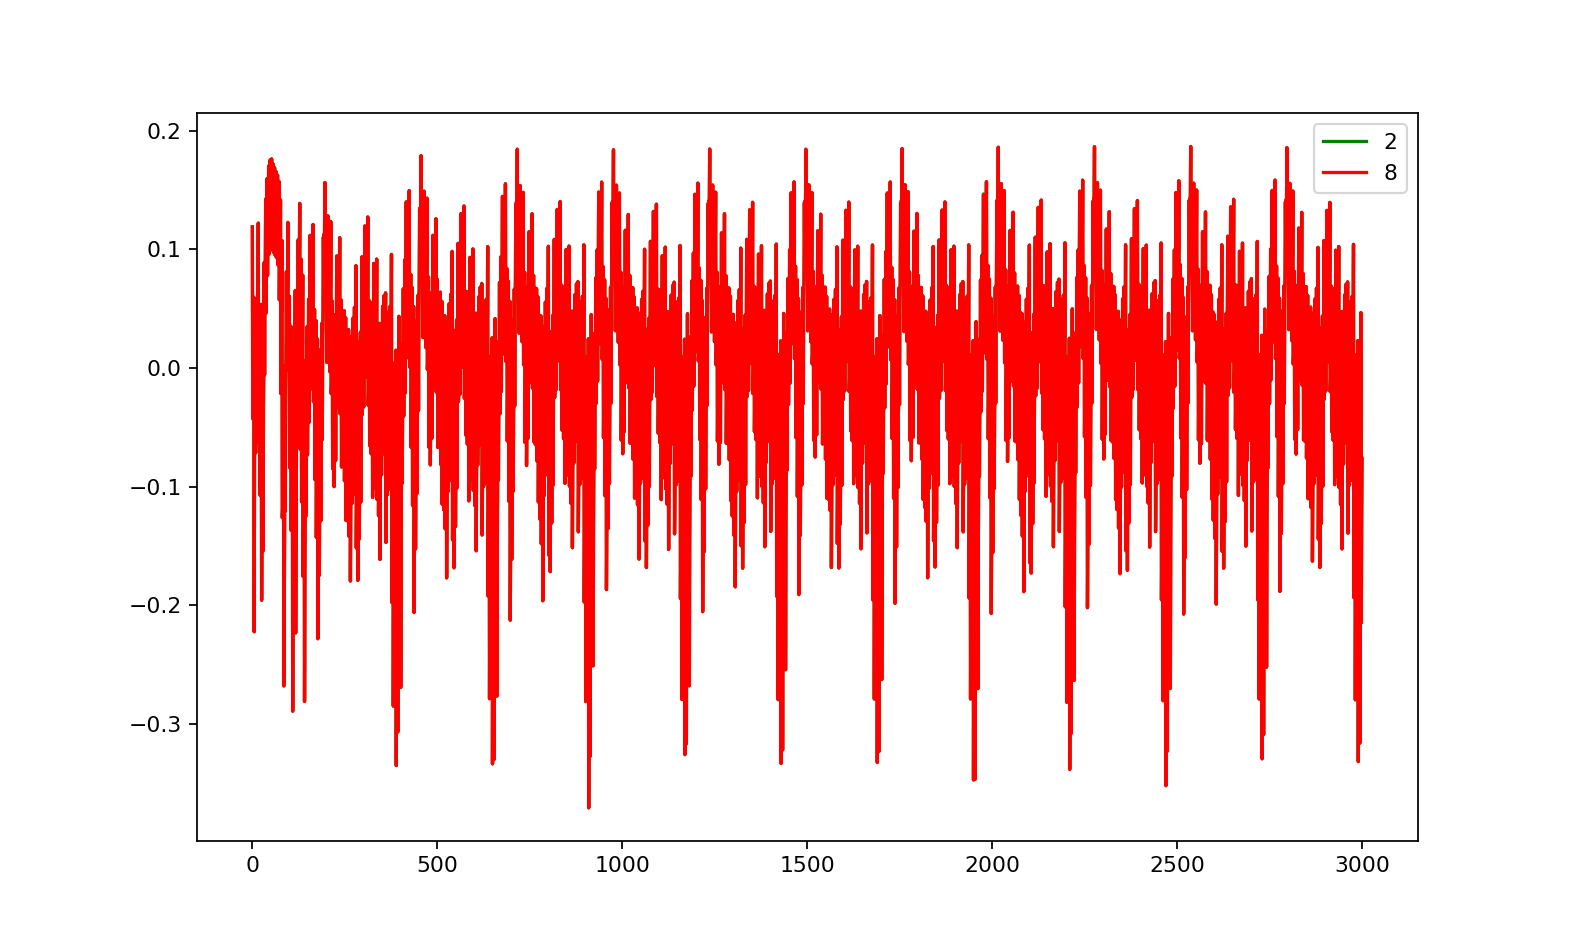

In [142]:
import matplotlib.pyplot as plt
from ipywidgets import interact
#trace_h = cap_pass_trace(features_string[1]+"\n")
#time.sleep(2)
#trace_0 = cap_pass_trace(features_string[3]+"\n")
plt.figure(figsize=(10,6))

plt.plot(avg_2, label = "2", c='g')
plt.plot(avg_8, label = "8", c='r')
plt.legend()
plt.show()

In [105]:
print(label[0:9])

['7', '2', '1', '0', '4', '1', '4', '9', '5']


0 
2 


<IPython.core.display.Javascript object>


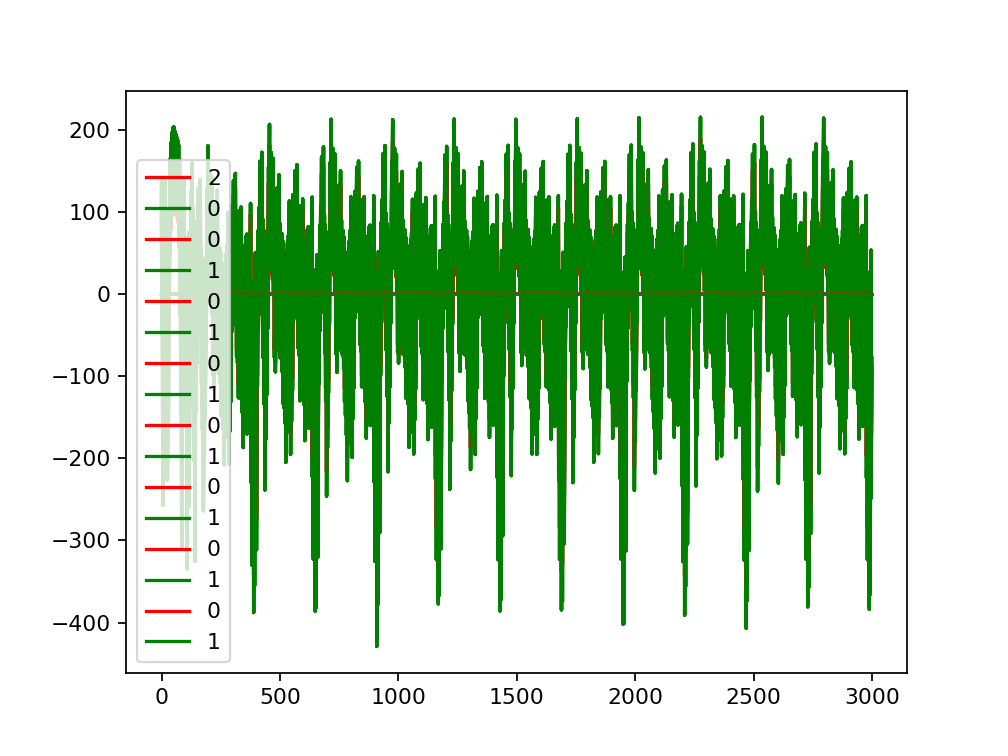

In [93]:
# %matplotlib notebook
# #Example - capture 'h' - end with newline '\n' as serial protocol expects that
# #
# # blank_trace = "0"*784+"\n"
# # print(blank_trace)
# # trace_h = cap_pass_trace(blank_trace+"\n")

# # print(trace_h)

# #cw.plot(cap_pass_trace("h\n"),c='r') * cw.plot(cap_pass_trace("0\n"),c='g')
# import matplotlib.pyplot as plt
# from ipywidgets import interact
# trace_h = cap_pass_trace(features_string[1]+"\n")
# time.sleep(2)
# trace_0 = cap_pass_trace(features_string[3]+"\n")
# plt.plot(trace_h, label = "2", c='r')
# plt.plot(trace_0, label = "0", c='g')
# plt.legend()